In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment2-machineLearning/NAS.csv')

In [3]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataframe.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [5]:
#remove null-values
dataframe = dataframe.dropna()
dataframe.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
def str_to_days(string):
    date = pd.to_datetime(string)
    date0 = pd.Timestamp('2003-01-01')
    time_diff = date-date0
    return time_diff.days

In [7]:
days_since_jan2003 = []
for date in dataframe['Date']:
    days_since_jan2003.append(str_to_days(date))


In [8]:
dataframe['Days since 2003-01-01'] = days_since_jan2003

In [9]:
dataframe.drop('Date', axis=1, inplace=True)
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume,Days since 2003-01-01
0,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,351
1,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,352
2,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,355
3,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,356
7,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,362


In [10]:
dataframe.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [11]:
input_ = dataframe.drop('Close', axis=1)
output = dataframe['Close']

In [12]:
input_.head()

,Days since 2003-01-01
0,351
1,352
2,355
3,356
7,362


In [13]:
output.head()

0    19.139799
1    18.454201
2    18.054300
3    17.425800
7    17.254400
Name: Close, dtype: float64

In [14]:
from sklearn import linear_model

regObj = linear_model.LinearRegression()
regObj.fit(input_, output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

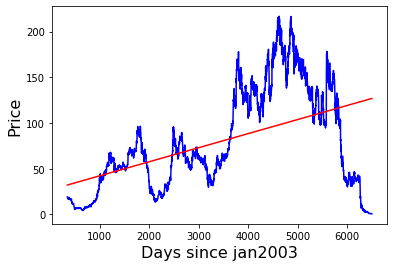

In [15]:
plt.xlabel('Days since jan2003', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.plot(dataframe['Days since 2003-01-01'], dataframe['Close'], color='blue')
plt.plot(dataframe['Days since 2003-01-01'], regObj.predict(dataframe[['Days since 2003-01-01']]), color='red')

In [16]:
coeff = regObj.coef_
print(coeff)

[0.0153956]


In [17]:
intercept = regObj.intercept_
print(intercept)

26.828365745961747


In [22]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x = dataframe['Days since 2003-01-01'].values.reshape(-1,1)
y = dataframe['Close'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

polynom = PolynomialFeatures(degree=10)
x_train_polynom = polynom.fit_transform(x_train)

polynom.fit(x_train_polynom, y_train)
curve = linear_model.LinearRegression().fit(x_train_polynom, y_train)

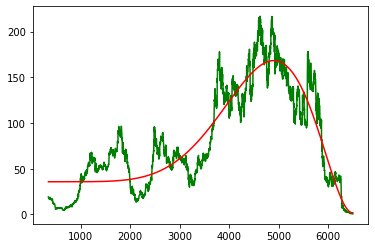

In [23]:
y_prediction = curve.predict(polynom.fit_transform(x))

plt.plot(dataframe['Days since 2003-01-01'],dataframe['Close'], color='green')
plt.plot(dataframe['Days since 2003-01-01'], y_prediction, color='red')

